### **Project 01: Data Preprocessing and Classification**

In [303]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


The following code cell installs additional dependencies required to run the Jupyter Notebooks used in this class.

In [304]:
# Add additional Python packages that we will be using in class
!apt install graphviz build-essential checkinstall imagemagick
# Base Python packages to run example Jupyter Notebooks
!pip install watermark pyprind mlxtend
# Python packages to visualize Decision Tree Classifiers
!pip install pydotplus graphviz pyparsing
# Python packages for Natrual Language Processing
!pip install nltk
# Python packages for Flask-based web applications
!pip install flask wtforms
# Python packages for TensorFlowdf.select_dtypes(include=['int64','float64']).columns
!pip install tensorflow tensorflow-datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
checkinstall is already the newest version (1.6.2-4ubuntu2).
graphviz is already the newest version (2.40.1-2).
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.11).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


The following code cell defines a variable equal to the location inside your Google Drive where you copied the ch03 folder

In [305]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch03 FOLDER #####
google_drive_root='/Colab Notebooks/'

In [306]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

The following code cell mounts your Google Drive into the runtime of the workbook, so that you can access files.

In [307]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [308]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Sebastian Raschka

Last updated: 2021-10-27

numpy     : 1.19.5
pandas    : 1.1.5
matplotlib: 3.2.2
sklearn   : 0.0



In [309]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns

# **1. Experiment Objective**

The goal of this project is to predict gender of student based on this Colorado education data. I am attempting to create a Logistic Regression model that can provide a person's gender based on the institution, major, ethnicity, age, degree level, and residency.

Please see this link for a description of the dataset.
https://data.colorado.gov/Higher-Education/degreesAwarded/m279-sgtm

This data pulled from Colorado Information Marketplace which is run by the state of Colorado. 

Data was updated last updated in 2018 and consists of all students who have received a certificate, degree, or formal award approved by the CO Depart of Higher Education (DHE) during the report year. Also contains data on age, ethnicity, program name, and residency.

# **TOS information:**

"The data made available here has been modified for use from its original source, which is the State of Colorado. THE STATE OF COLORADO MAKES NO REPRESENTATIONS OR WARRANTY AS TO THE COMPLETENESS, ACCURACY, TIMELINESS, OR CONTENT OF ANY DATA MADE AVAILABLE THROUGH THIS SITE. THE STATE OF COLORADO EXPRESSLY DISCLAIMS ALL WARRANTIES, WHETHER EXPRESS OR IMPLIED, INCLUDING ANY IMPLIED WARRANTIES OF MERCHANTABILITY, OR FITNESS FOR A PARTICULAR PURPOSE. The data is subject to change as modifications and updates are complete. It is understood that the information contained in the Web feed is being used at one's own risk.\"

# 2. Data Collection

https://data.colorado.gov/Higher-Education/degreesAwarded/m279-sgtm

Data pulled from Colorado Information Marketplace

In [310]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/degreesAwarded.csv', header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,9,10,15,17,18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [311]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,year,institutionName,institutionLevelId,institutionLevel,institutionType,taxType,coBased,division,ageDesc,ageMin,ageMax,gender,ethnicity,studentLevel,degreeLevel,residencyId,residency,cip2,cip,programName,recordCount
1,2001,Aims Community College,2,College,Public,Not-for-Profit,Yes,DHE,Under 17,NaN,17,Female,"White, non-Hispanic",Undergraduate,Certificate,1,In-State,51,51.1614,NaN,NaN
2,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Unknown,Undergraduate,Bachelor,1,In-State,31,31.0301,"Parks, Recreation and Leisure Facilities Manag...",NaN
3,2001,Aims Community College,2,College,Public,Not-for-Profit,Yes,DHE,17-20,17,20,Female,Hispanic,Undergraduate,Certificate,1,In-State,20,20.0201,NaN,NaN
4,2001,Aims Community College,2,College,Public,Not-for-Profit,Yes,DHE,17-20,17,20,Female,Hispanic,Undergraduate,Certificate,1,In-State,51,51.1614,NaN,NaN


## **3. Data Preprocessing**

Looks like the column headers are the indices while the actual headers are the first row. Let's fix the column names.

In [312]:
df.columns = df.iloc[0].values
df = df.iloc[1:,:]

In [313]:
df.head()

,year,institutionName,institutionLevelId,institutionLevel,institutionType,taxType,coBased,division,ageDesc,ageMin,ageMax,gender,ethnicity,studentLevel,degreeLevel,residencyId,residency,cip2,cip,programName,recordCount
1,2001,Aims Community College,2,College,Public,Not-for-Profit,Yes,DHE,Under 17,NaN,17,Female,"White, non-Hispanic",Undergraduate,Certificate,1,In-State,51,51.1614,NaN,NaN
2,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Unknown,Undergraduate,Bachelor,1,In-State,31,31.0301,"Parks, Recreation and Leisure Facilities Manag...",NaN
3,2001,Aims Community College,2,College,Public,Not-for-Profit,Yes,DHE,17-20,17,20,Female,Hispanic,Undergraduate,Certificate,1,In-State,20,20.0201,NaN,NaN
4,2001,Aims Community College,2,College,Public,Not-for-Profit,Yes,DHE,17-20,17,20,Female,Hispanic,Undergraduate,Certificate,1,In-State,51,51.1614,NaN,NaN
5,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Unknown,Undergraduate,Bachelor,1,In-State,31,31.0301,"Parks, Recreation and Leisure Facilities Manag...",NaN


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221941 entries, 1 to 221941
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   year                221941 non-null  object
 1   institutionName     213650 non-null  object
 2   institutionLevelId  213650 non-null  object
 3   institutionLevel    213650 non-null  object
 4   institutionType     213650 non-null  object
 5   taxType             213650 non-null  object
 6   coBased             213650 non-null  object
 7   division            213650 non-null  object
 8   ageDesc             213650 non-null  object
 9   ageMin              212800 non-null  object
 10  ageMax              178649 non-null  object
 11  gender              221941 non-null  object
 12  ethnicity           221941 non-null  object
 13  studentLevel        221941 non-null  object
 14  degreeLevel         221941 non-null  object
 15  residencyId         221941 non-null  object
 16  re

These are all in object types. At least the age should be numerical.

In [315]:
df.isnull().sum()

year                       0
institutionName         8291
institutionLevelId      8291
institutionLevel        8291
institutionType         8291
taxType                 8291
coBased                 8291
division                8291
ageDesc                 8291
ageMin                  9141
ageMax                 43292
gender                     0
ethnicity                  0
studentLevel               0
degreeLevel                0
residencyId                0
residency                  0
cip2                       4
cip                        0
programName            24159
recordCount           207492
dtype: int64

That's quite a lot of missing values, but with the sheer size of the dataset, we can probably still make do with even if we blindly removed all rows with empty values.

In [316]:
df['ageMin'].unique()

array([nan, '17', '21', '25', '40', 25.0, 21.0, 40.0, 17.0], dtype=object)

In [317]:
df['ageMax'].unique()

array(['17', nan, '20', '24', '40', 40.0, 24.0, 20.0, 17.0], dtype=object)

The 'ageMin' and 'ageMax' are object types. Let's clean them up and convert them to numericals. 

'ageMax' has a lot more missing values than 'ageMin'.

In [318]:
df['ageMin'] = pd.to_numeric(df['ageMin'])

In [319]:
# Let's see if it worked
df['ageMin'].unique()

array([nan, 17., 21., 25., 40.])

In [320]:
df['ageMax'] = pd.to_numeric(df['ageMax'])

In [321]:
df['ageMax'].unique()

array([17., nan, 20., 24., 40.])

In [322]:
df['ageMin'].unique()

array([nan, 17., 21., 25., 40.])

In [323]:
df['ageAvg'] = (df['ageMin'] + df['ageMax'])/2

Instead of using two age metrics, let's simplify ageMin and ageMax into a new feature called 'ageMedian'. 'ageAvg' is calculated by taking the Max and the Min divided by 2. 

We could also impute the nan values here as well by looking at the ages of people based on the 'degreeLevel' and 'gender' impute their ages based on the averages of those. 

degreeLevel - data on whether one is an undergrad, grad or phd student is a good predictor of age. Very rare to see extremes where phd students are very young or undergraduates very old.

gender - just to see if there's a difference.

In [324]:
df['ageAvg'].unique()

array([ nan, 18.5, 22.5, 32.5])

In [325]:
df.groupby(['degreeLevel','gender'])['ageAvg'].agg(['mean','count'])

mean  count
degreeLevel   gender                   
Associate     Female   26.234812  17942
              Male     25.994725  15544
              Unknown  26.983871    186
Bachelor      Female   25.723257  38337
              Male     26.357123  36367
              Unknown  29.868421     57
Certificate   Female   26.363056  18241
              Male     25.978891  17125
              Unknown  25.712308    325
Doctoral      Female   32.460568   2536
              Male     32.486550   2974
              Unknown  32.500000      1
Masters       Female   29.668543  14038
              Male     30.063651  12600
              Unknown  32.500000     46
OtherGraduate Male     32.500000      1
Professional  Female   30.432285    827
              Male     30.938003    621
Specialist    Female   31.880531    113
              Male     32.074468     47
              Unknown  32.500000      1

Looks like there's not much of a difference between male and female.

Interesting to note:

Slightly more females - Associate, Bachelor, Certificate (roughly the same), Masters, Professional, and Specialist.

More males - Doctoral

Let's fill in the NaN age values with the corresponding professions and gender.

In [326]:
df.isnull().sum()

year                       0
institutionName         8291
institutionLevelId      8291
institutionLevel        8291
institutionType         8291
taxType                 8291
coBased                 8291
division                8291
ageDesc                 8291
ageMin                  9141
ageMax                 43292
gender                     0
ethnicity                  0
studentLevel               0
degreeLevel                0
residencyId                0
residency                  0
cip2                       4
cip                        0
programName            24159
recordCount           207492
ageAvg                 44012
dtype: int64

In [327]:
df['institutionLevelId'].unique()

array(['2', nan, '4', 2, 4], dtype=object)

In [328]:
df['institutionName'].unique()

array(['Aims Community College', nan,
       'University of Colorado Colorado Springs',
       'University of Colorado Boulder', 'Arapahoe Community College',
       'Pikes Peak Community College', 'Colorado School of Mines',
       'Colorado State University', 'Red Rocks Community College',
       'Colorado State University - Pueblo', 'Colorado Mountain College',
       'Colorado Mesa University', 'CSU-Global Campus',
       'University of Colorado Denver', 'Community College of Aurora',
       'Community College of Denver', 'Front Range Community College',
       'Lamar Community College', 'Otero Junior College',
       'Morgan Community College', 'Northeastern Junior College',
       'Pueblo Community College', 'Trinidad State Junior College',
       'Adams State University',
       'Metropolitan State University of Denver', 'Fort Lewis College',
       'University of Northern Colorado',
       'Western State Colorado University',
       'Colorado Northwestern Community College'], d

In [329]:
df['institutionType'].unique()

array(['Public', nan], dtype=object)

In [330]:
df = df.dropna(subset=['institutionType'])

In [331]:
df = df.dropna(subset=['programName'])

In [332]:
df.isnull().sum()

year                       0
institutionName            0
institutionLevelId         0
institutionLevel           0
institutionType            0
taxType                    0
coBased                    0
division                   0
ageDesc                    0
ageMin                   772
ageMax                 31081
gender                     0
ethnicity                  0
studentLevel               0
degreeLevel                0
residencyId                0
residency                  0
cip2                       0
cip                        0
programName                0
recordCount           177494
ageAvg                 31736
dtype: int64

In [333]:
grp = df.groupby(['degreeLevel','gender'])['ageAvg'].mean()

In [334]:
grp = df.groupby(['degreeLevel','gender'])['ageAvg'].mean().reset_index()[['degreeLevel','gender','ageAvg']]
print(grp)

      degreeLevel   gender     ageAvg
0       Associate   Female  26.211264
1       Associate     Male  25.986882
2       Associate  Unknown  26.988889
3        Bachelor   Female  25.733947
4        Bachelor     Male  26.367034
5        Bachelor  Unknown  29.954545
6     Certificate   Female  26.339486
7     Certificate     Male  25.879941
8     Certificate  Unknown  25.784810
9        Doctoral   Female  32.456408
10       Doctoral     Male  32.485348
11       Doctoral  Unknown        NaN
12        Masters   Female  29.641486
13        Masters     Male  30.006280
14        Masters  Unknown  32.500000
15  OtherGraduate     Male  32.500000
16   Professional   Female  30.396679
17   Professional     Male  30.927877
18     Specialist   Female  32.122642
19     Specialist     Male  31.759259


In [335]:
# this function looks at the 'degreeLevel' and 'gender' columns and fills in the 'ageAvg' column based on those values.
def fill_age(x):
    return grp[(grp.degreeLevel==x.degreeLevel)&(grp.gender==x.gender)]['ageAvg'].values[0]

In [336]:
df['ageAvg'] = df.apply(lambda x: fill_age(x) if np.isnan(x['ageAvg']) else x['ageAvg'], axis=1)

In [337]:
df.isnull().sum()

year                       0
institutionName            0
institutionLevelId         0
institutionLevel           0
institutionType            0
taxType                    0
coBased                    0
division                   0
ageDesc                    0
ageMin                   772
ageMax                 31081
gender                     0
ethnicity                  0
studentLevel               0
degreeLevel                0
residencyId                0
residency                  0
cip2                       0
cip                        0
programName                0
recordCount           177494
ageAvg                     2
dtype: int64

Still have 2 NaNs. Must be Doctoral, Unknowns. In this case we can just fill them with 32.5 since both male and female doctoral entries are the same.

In [338]:
df.loc[df['ageAvg'].isnull()]

,year,institutionName,institutionLevelId,institutionLevel,institutionType,taxType,coBased,division,ageDesc,ageMin,ageMax,gender,ethnicity,studentLevel,degreeLevel,residencyId,residency,cip2,cip,programName,recordCount,ageAvg
65693,2007,Colorado State University,4,University,Public,Not-for-Profit,Yes,DHE,Unknown,NaN,NaN,Unknown,Unknown Ethnicity,Graduate,Doctoral,1,In-State,45,45.1101,Sociology,NaN,NaN
196267,2003,Colorado State University,4,University,Public,Not-for-Profit,Yes,DHE,Unknown,NaN,NaN,Unknown,Unknown Ethnicity,Graduate,Doctoral,1,In-State,42,42.0101,"Psychology, General",NaN,NaN


In [339]:
df['ageAvg'] = df['ageAvg'].fillna(value=32.5)

Sweet. Looks like we got rid of all the missing values for ageMedian. Let's drop 'ageMin' and 'ageMax'

In [340]:
df['ageAvg'].values

array([22.5       , 22.5       , 22.5       , ..., 25.98688166,
       32.5       , 22.5       ])

In [341]:
df['ageAvg'] = df['ageAvg'].astype(int)

Let's convert 'ageAvg' to ints too. Otherwise we'd have multiple discrete values of what is really the same number.

In [342]:
df.isnull().sum()

year                       0
institutionName            0
institutionLevelId         0
institutionLevel           0
institutionType            0
taxType                    0
coBased                    0
division                   0
ageDesc                    0
ageMin                   772
ageMax                 31081
gender                     0
ethnicity                  0
studentLevel               0
degreeLevel                0
residencyId                0
residency                  0
cip2                       0
cip                        0
programName                0
recordCount           177494
ageAvg                     0
dtype: int64

In [343]:
df['institutionLevelId'].unique()

array(['4', '2', 2, 4], dtype=object)

It should be either 2 or 4. Let's consolidate these.

In [344]:
df['institutionLevelId'] = pd.to_numeric(df['institutionLevelId'])

In [345]:
df['institutionLevelId'].unique()

array([4, 2])

In [346]:
df['institutionLevelId'] = df['institutionLevelId'].astype(object)

In [347]:
df['coBased'].unique()

array(['Yes'], dtype=object)

It only has 1 value. Put this on the list of features to drop.

In [348]:
df['institutionLevel'].unique()

array(['University', 'College'], dtype=object)

Only two classes. degreeLevel has more granularity, so this is unnecessary. Drop.

In [349]:
df['institutionType'].unique()

array(['Public'], dtype=object)

Single value. Drop.

In [350]:
df['taxType'].unique()

array(['Not-for-Profit'], dtype=object)

Single value. Drop.

In [351]:
df['division'].unique()

array(['DHE'], dtype=object)

In [352]:
df['ageDesc'].unique()

array(['21-24', 'Over 40', '25-40', '17-20', 'Under 17', 'Unknown'],
      dtype=object)

In [353]:
df['ethnicity'].unique()

array(['White, non-Hispanic',
       'More than one race/ethnicity (non-hispanic)', 'Unknown Ethnicity',
       'Unknown', 'Black or African American, non-Hispanic',
       'Non-Resident Alien', 'Asian', 'Hispanic',
       'Native American or Alaskan Native', 'Asian or Pacific Islander',
       'Hawaiian or Pacific Islander', 'Black or African American'],
      dtype=object)

Might consider mapping some of these ethnicities to Race instead to simplify things. Black, Asian, White.

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190198 entries, 19 to 221941
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                190198 non-null  object 
 1   institutionName     190198 non-null  object 
 2   institutionLevelId  190198 non-null  object 
 3   institutionLevel    190198 non-null  object 
 4   institutionType     190198 non-null  object 
 5   taxType             190198 non-null  object 
 6   coBased             190198 non-null  object 
 7   division            190198 non-null  object 
 8   ageDesc             190198 non-null  object 
 9   ageMin              189426 non-null  float64
 10  ageMax              159117 non-null  float64
 11  gender              190198 non-null  object 
 12  ethnicity           190198 non-null  object 
 13  studentLevel        190198 non-null  object 
 14  degreeLevel         190198 non-null  object 
 15  residencyId         190198 non-nu

In [355]:
df['studentLevel'].unique()

array(['Undergraduate', 'Graduate'], dtype=object)

In [356]:
df['residencyId'].unique()

array(['2', '1', '3', 1, 2, 3], dtype=object)

In [357]:
df['residencyId'] = pd.to_numeric(df['residencyId'])
df['residencyId'] = df['residencyId'].astype(object)

In [358]:
df['residency'].unique()

array(['Out-of-State', 'In-State', 'Unclassified/Unspecified'],
      dtype=object)

Not sure what to do with this feature yet.

In [359]:
df['programName'].unique()

array(['Electrical and Electronics Engineering',
       'Business Administration and Management, General',
       'Economics, General', 'History, General',
       'Kinesiology and Exercise Science',
       'Medical Office Management/Administration',
       'Mechanical Engineering', 'Civil Engineering, General',
       'Criminal Justice/Law Enforcement Administration',
       'Psychology, General', 'Legal Assistant/Paralegal',
       'Fire Science/Fire-fighting',
       'Biology/Biological Sciences, General', 'Art/Art Studies, General',
       'Political Science and Government, General',
       'Library and Information Science', 'Reading Teacher Education',
       'Public Health, General', 'Curriculum and Instruction',
       'Child Development', 'Music Performance, General',
       'Welding Technology/Welder',
       'Liberal Arts and Sciences, General Studies and Humanities, Other',
       'Cooking and Related Culinary Arts, General',
       'Computer/Information Technology Services A

Might want to feature engineer these into more broader group such as:
- STEM
- Social Sciences
- Life Sciences
- Art
- Business/Administrative

In [360]:
df.head()

,year,institutionName,institutionLevelId,institutionLevel,institutionType,taxType,coBased,division,ageDesc,ageMin,ageMax,gender,ethnicity,studentLevel,degreeLevel,residencyId,residency,cip2,cip,programName,recordCount,ageAvg
19,2016,University of Colorado Colorado Springs,4,University,Public,Not-for-Profit,Yes,DHE,21-24,21.0,24.0,Male,"White, non-Hispanic",Undergraduate,Bachelor,2,Out-of-State,14,14.1001,Electrical and Electronics Engineering,NaN,22
199,2016,University of Colorado Colorado Springs,4,University,Public,Not-for-Profit,Yes,DHE,21-24,21.0,24.0,Male,More than one race/ethnicity (non-hispanic),Undergraduate,Bachelor,1,In-State,14,14.1001,Electrical and Electronics Engineering,NaN,22
279,2016,Colorado School of Mines,4,University,Public,Not-for-Profit,Yes,DHE,21-24,21.0,24.0,Male,"White, non-Hispanic",Undergraduate,Bachelor,1,In-State,14,14.1001,Electrical and Electronics Engineering,18,22
422,2013,Red Rocks Community College,2,College,Public,Not-for-Profit,Yes,DHE,Over 40,40.0,NaN,Male,"White, non-Hispanic",Undergraduate,Certificate,1,In-State,52,52.0201,"Business Administration and Management, General",NaN,25
512,2001,Colorado State University,4,University,Public,Not-for-Profit,Yes,DHE,25-40,25.0,40.0,Female,Unknown Ethnicity,Graduate,Masters,1,In-State,45,45.0601,"Economics, General",NaN,32


In [361]:
df.loc[df['programName'].str.contains('Engineering|Geochemistry|Computer Science|Mathematics|Physical Sciences|Astrophysics|Geographic|Research|Environmental|Physics|Chemistry|Statistic|Natural|Astronomy|Information Science|Information Sciences|Geophysics|Geology|Geography|Computer Systems|Meteorology|Library and Information Science'), 'programName'] = 'STEM'

In [362]:
df.loc[df['programName'].str.contains('Political|Cognitive|Social|History|Criminal|Government|Philosophy|Teaching|Organizational|Liberal|Linguistics|Communication Sciences|Literature|Anthropology|Psychology|Rhetoric|Sociology|Economics|Education|Development|Religion|International|Funeral|Counselor|Humanities|Family|Behavioral|Public|Counseling|Sign Language|Human Services'), 'programName'] = 'Social Sciences'

In [363]:
df.loc[df['programName'].str.contains('Biostatistics|Biophysics|Biology|Medical|Physician|Medicine|Clinical|Audiology|Neuroscience|Biomedical|Sustainability|Mental|Dentistry|Dental|Physical Therapy|Holistic|Nursing|Kinesiology and Exercise|Biochemistry|Physiology|Ecology|Pathologist|Microbiology|Occupational Therapy|Athletic Training|Respiratory|Dietitian|Nutrition|Pharmacy|Health Sciences|Biological'), 'programName'] = 'Life Sciences'

In [364]:
df.loc[df['programName'].str.contains('Clerical|Administration|Administrator|Management|Archives|Business|Operations|Finance|Paralegal|Office|Accounting|Law|Parks|Entrepreneurship'), 'programName'] = 'Business/Administrative'

In [365]:
df.loc[df['programName'].str.contains('Technician|Assistant|Specialist|Barber|Machinist|Welding|Fire|Welding|Radiographer|Electrician|Woodworking|Technician|Technologist|Cosmetology|Vocational|Gunsmith|Real Estate|Lineworker|Information Technology|Massage|Commercial|Physical Education|Construction'), 'programName'] = 'Trade'

In [366]:
df.loc[df['programName'].str.contains('Arts|Dance|Music|Animation|Art|Writing|Creative|Graphic Design|Interior Design|Cinematography|Film|Graphic|Design|Photography'), 'programName'] = 'Art'

In [367]:
pd.set_option('display.max_rows',None)

In [368]:
drop_indexes = df[(df['programName'] != 'STEM') & (df['programName'] != 'Social Sciences') & (df['programName'] != 'Life Sciences') & (df['programName'] != 'Business/Administrative') & (df['programName'] != 'Trade') & (df['programName'] != 'Art') & (df['programName'] != 'General Studies')].index

In [369]:
df.drop(drop_indexes,inplace=True)

In [370]:
df['programName'].value_counts()

Social Sciences            60675
STEM                       31810
Life Sciences              30449
Business/Administrative    27954
Trade                      18899
Art                        11600
General Studies             4859
Name: programName, dtype: int64

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186246 entries, 19 to 221941
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                186246 non-null  object 
 1   institutionName     186246 non-null  object 
 2   institutionLevelId  186246 non-null  object 
 3   institutionLevel    186246 non-null  object 
 4   institutionType     186246 non-null  object 
 5   taxType             186246 non-null  object 
 6   coBased             186246 non-null  object 
 7   division            186246 non-null  object 
 8   ageDesc             186246 non-null  object 
 9   ageMin              185507 non-null  float64
 10  ageMax              156061 non-null  float64
 11  gender              186246 non-null  object 
 12  ethnicity           186246 non-null  object 
 13  studentLevel        186246 non-null  object 
 14  degreeLevel         186246 non-null  object 
 15  residencyId         186246 non-nu

In [372]:
df = df.drop(['ageMin','ageMax','recordCount','cip2','cip','studentLevel','residencyId','ageDesc','institutionLevelId','institutionType','coBased','taxType','division'],axis=1)

Now let's drop 'ageMin','ageMax','recordCount','cip2','cip','studentLevel','residencyId','ageDesc','institutionLevelId','institutionType','coBased','taxType', and 'division'.

I want to save 'year' for now just to do some data visualizations with.

In [373]:
print((221941/len(df) - 1)*100, '% reduction of rows')

19.16551227945835 % reduction of rows


We started with 221941 rows down to 186246. A 19% reduction.

# **3a. Data Visualization**

We've cleaned up the data. Now on to data visualization.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

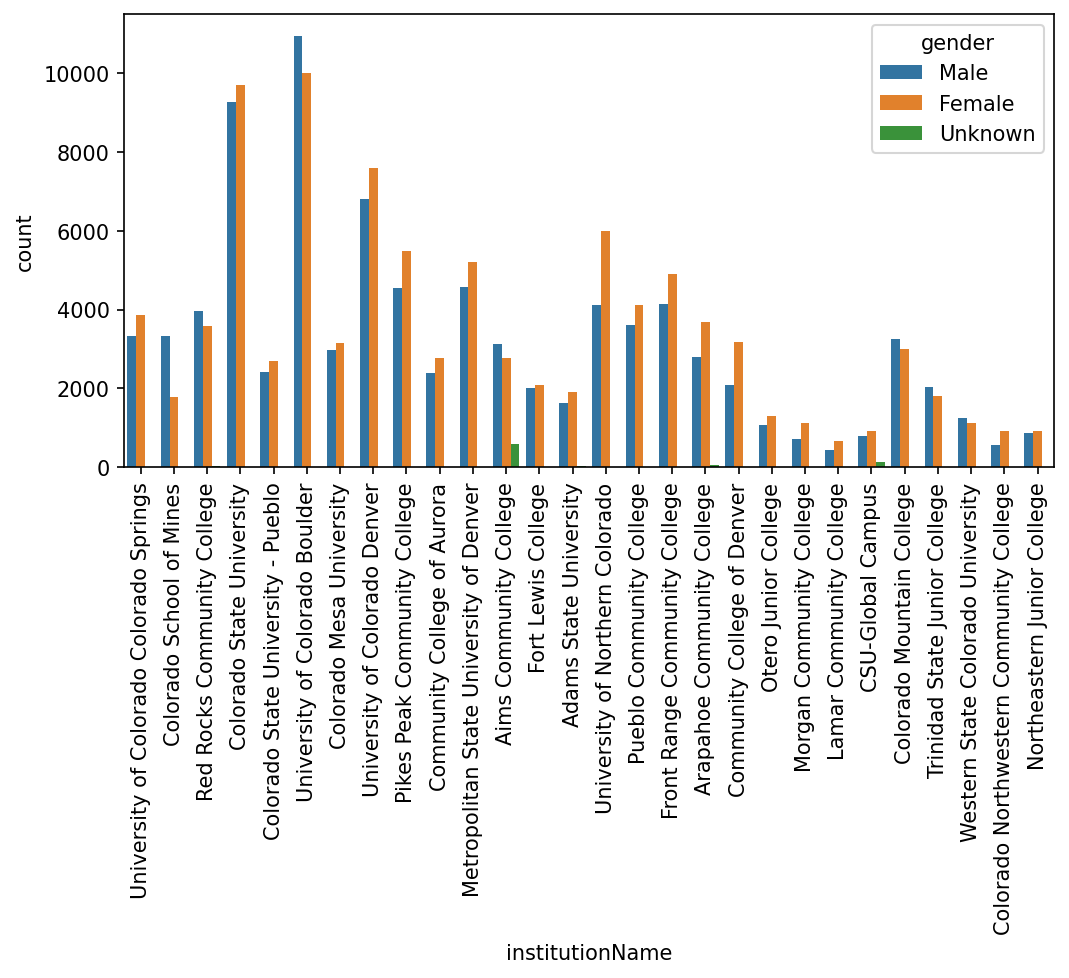

In [374]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='institutionName',data=df, hue= 'gender')
plt.xticks(rotation=90)

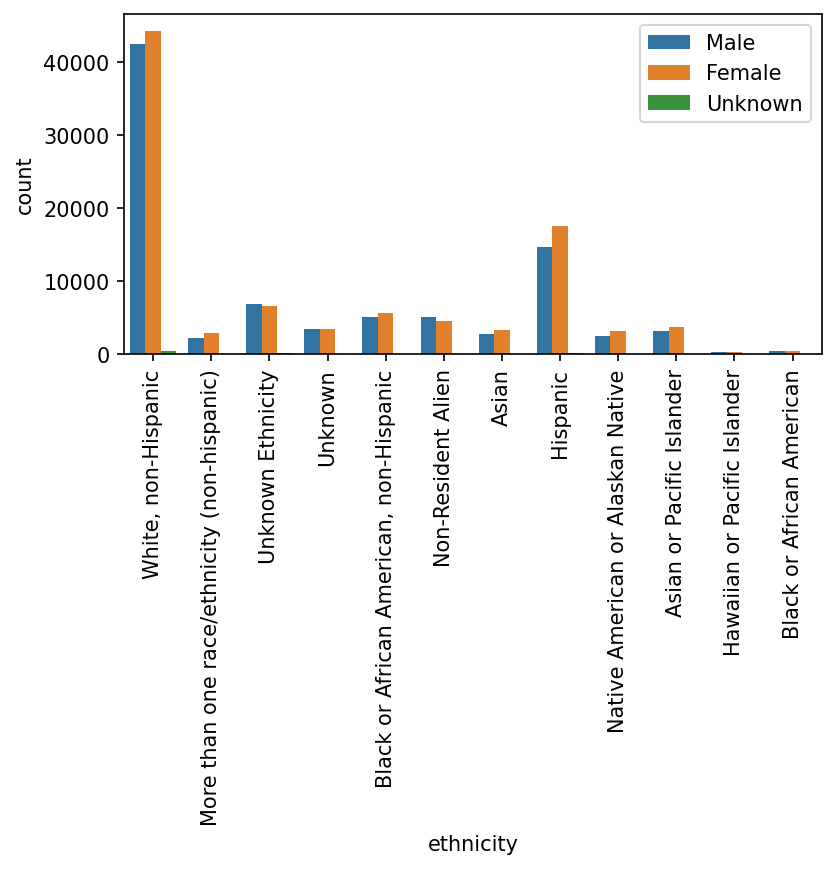

In [375]:
plt.figure(figsize=(6,3),dpi=150)
sns.countplot(x='ethnicity',data=df, hue= 'gender')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

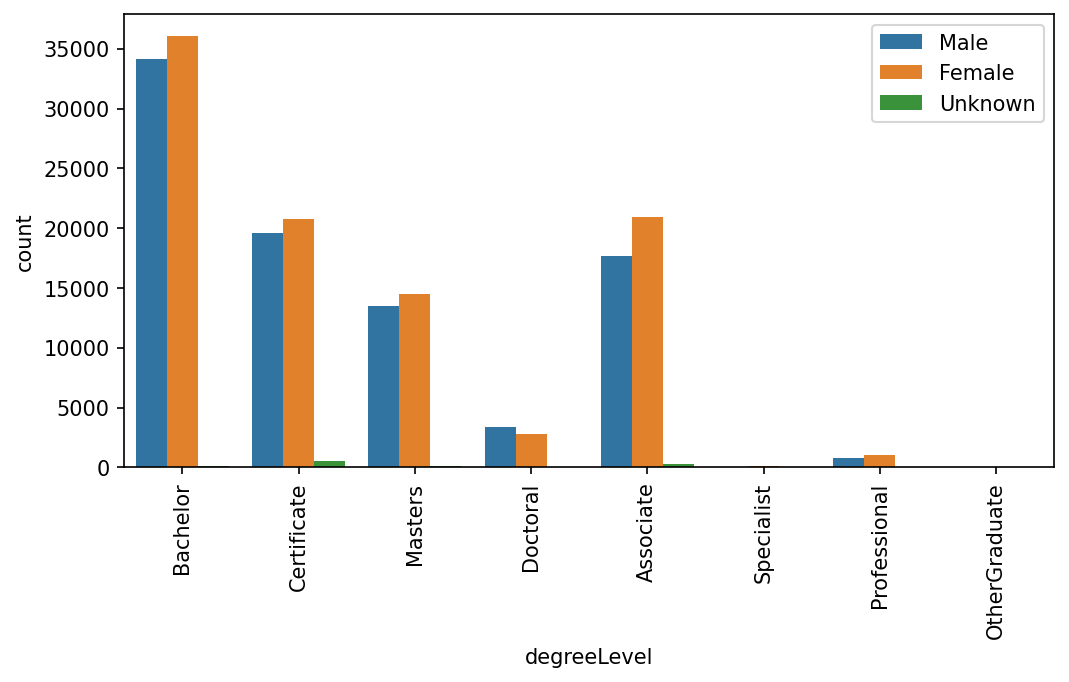

In [376]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='degreeLevel',data=df, hue= 'gender')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

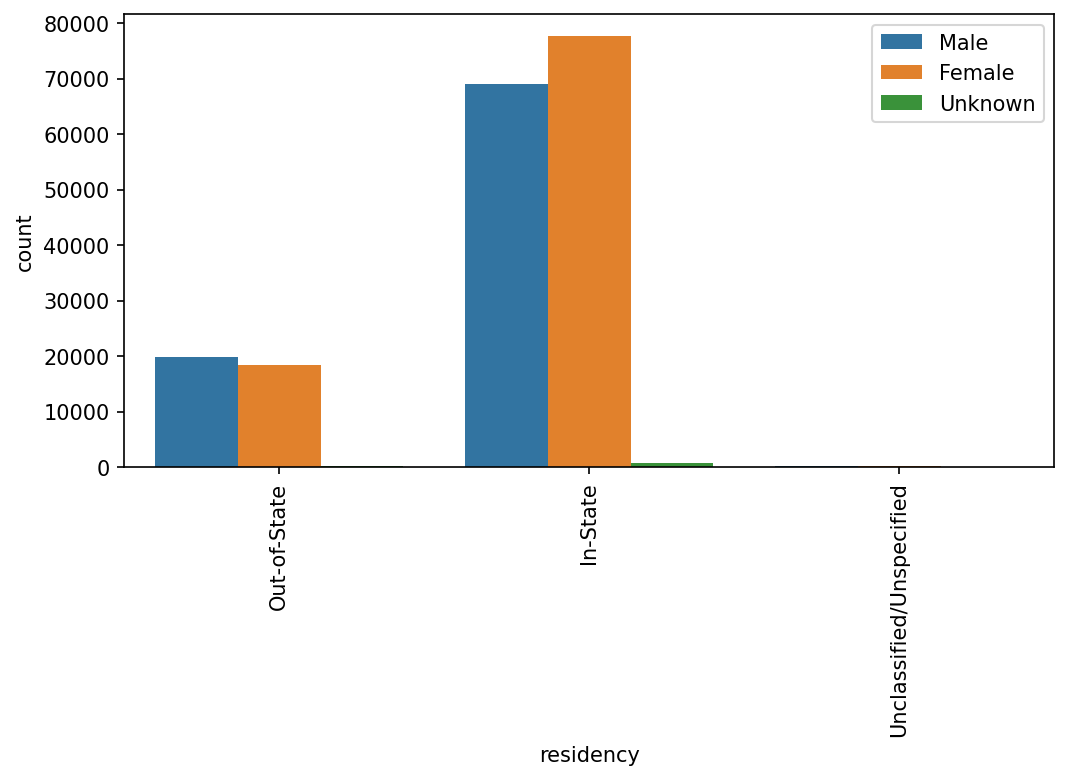

In [377]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='residency',data=df, hue= 'gender')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

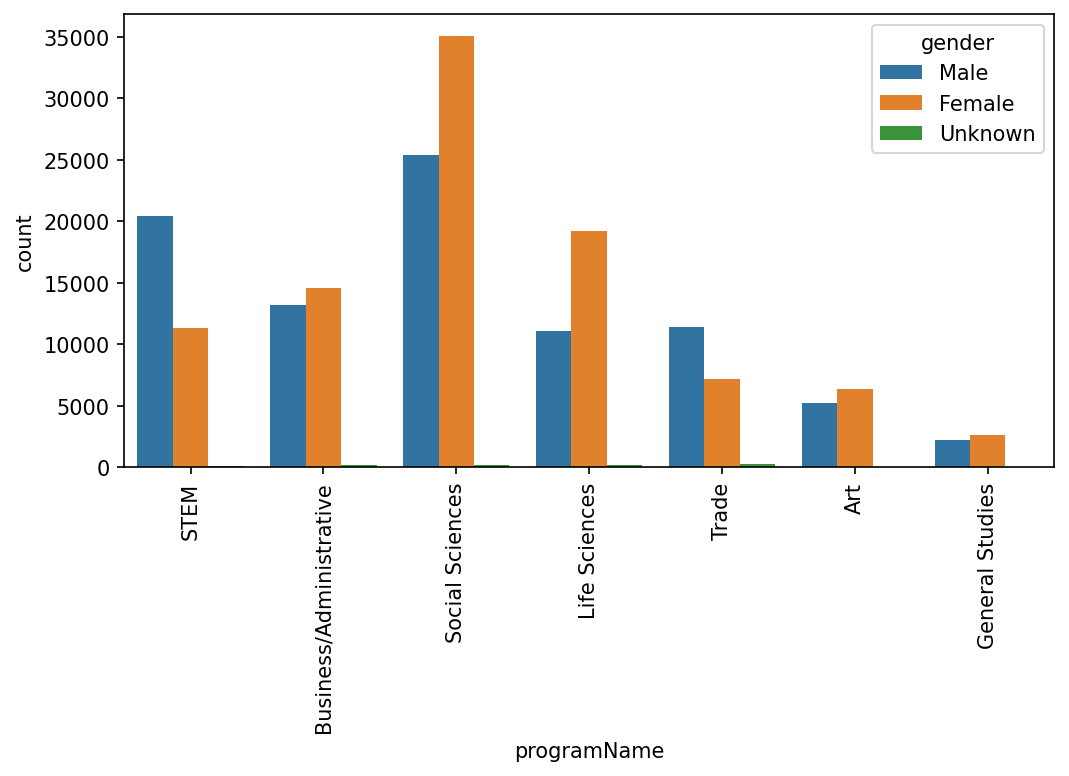

In [378]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='programName',data=df, hue= 'gender')
plt.xticks(rotation=90)

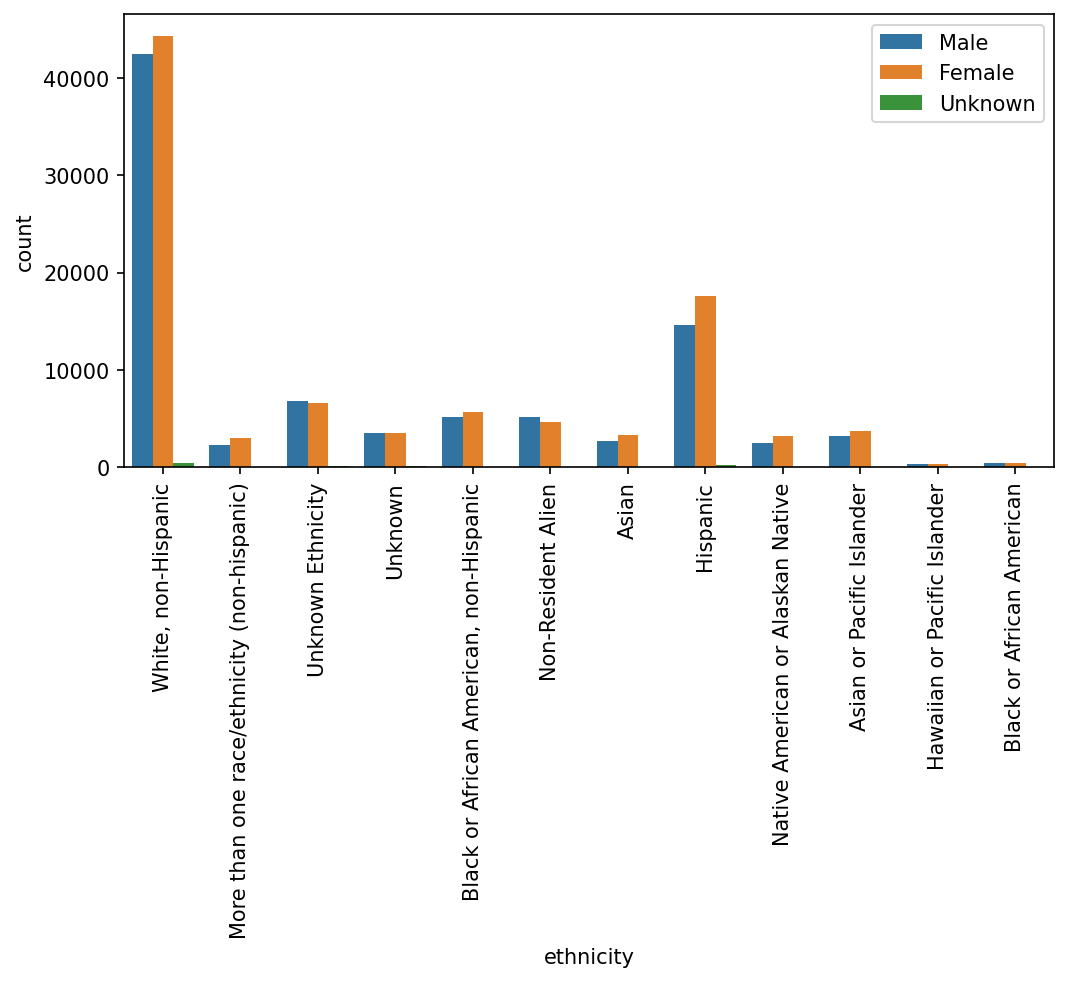

In [379]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='ethnicity',data=df, hue= 'gender')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

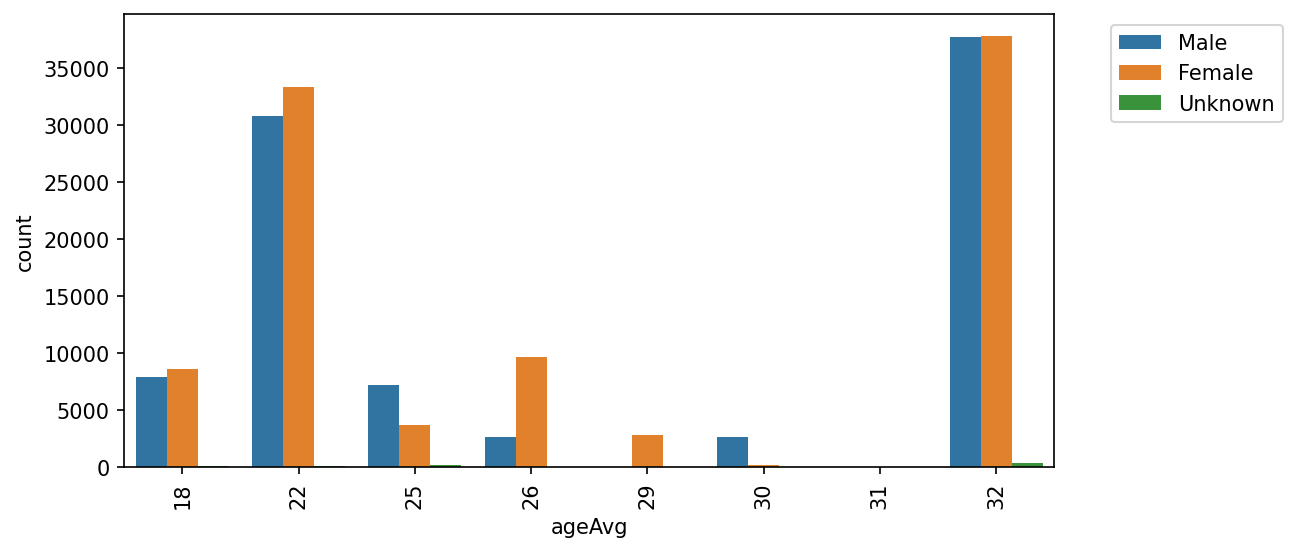

In [380]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='ageAvg',data=df, hue= 'gender')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (1.05, 1))

No handles with labels found to put in legend.


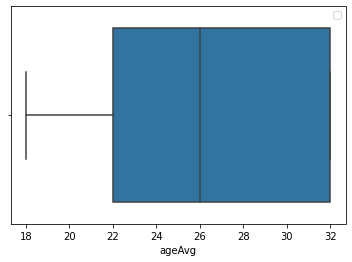

In [381]:
sns.boxplot(x='ageAvg',data=df, hue= 'gender')
plt.legend(loc='upper right')

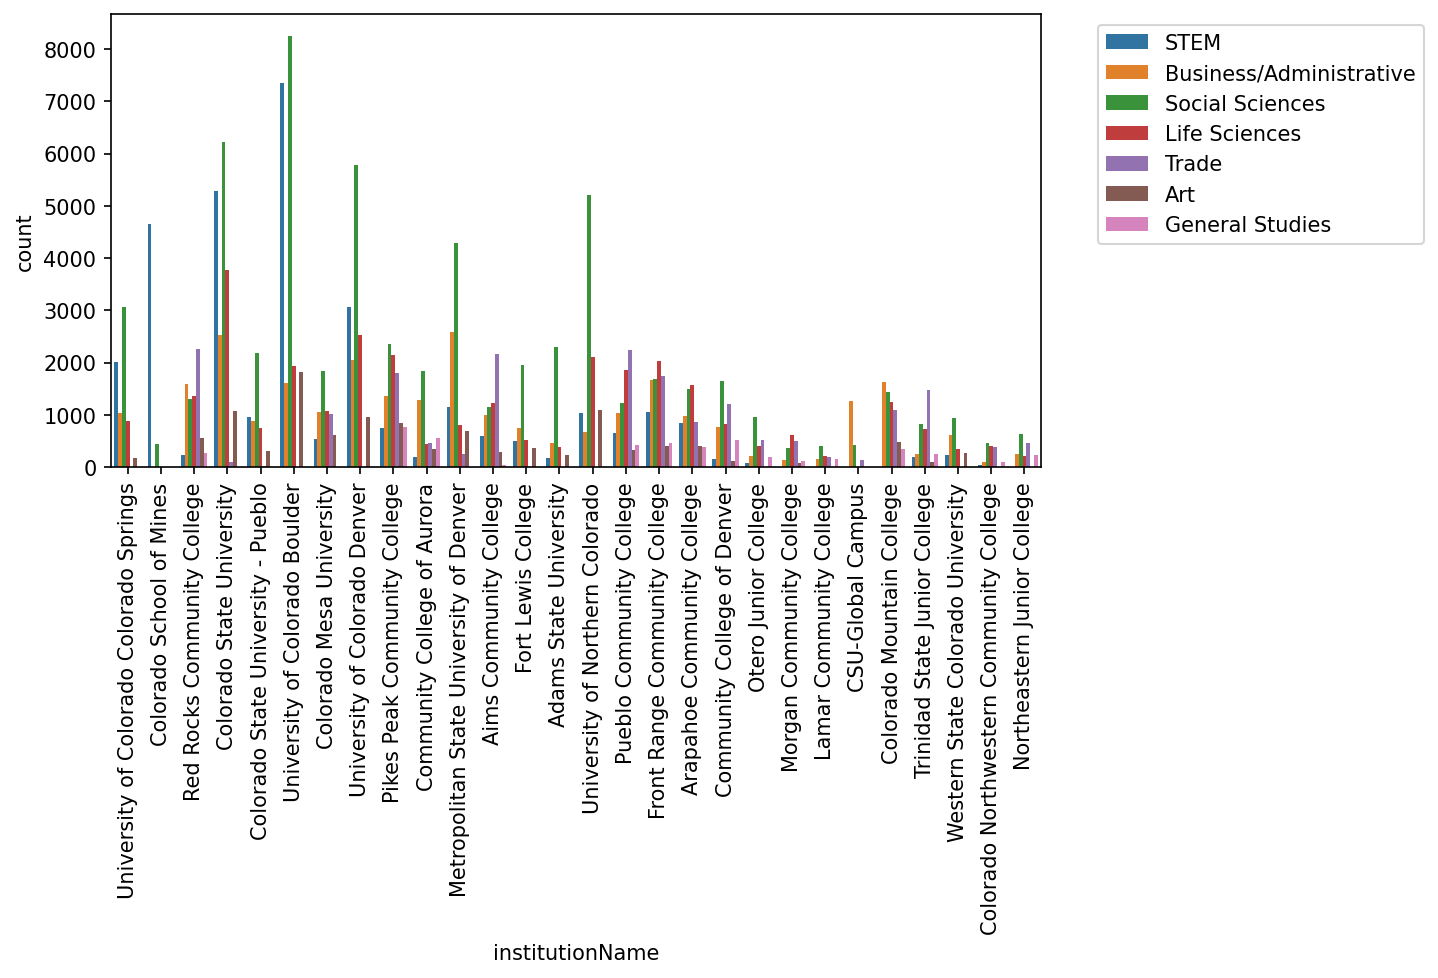

In [382]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='institutionName',data=df, hue='programName', palette = 'tab10')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (1.05, 1))

In [383]:
df['year'] = df['year'].astype(int)

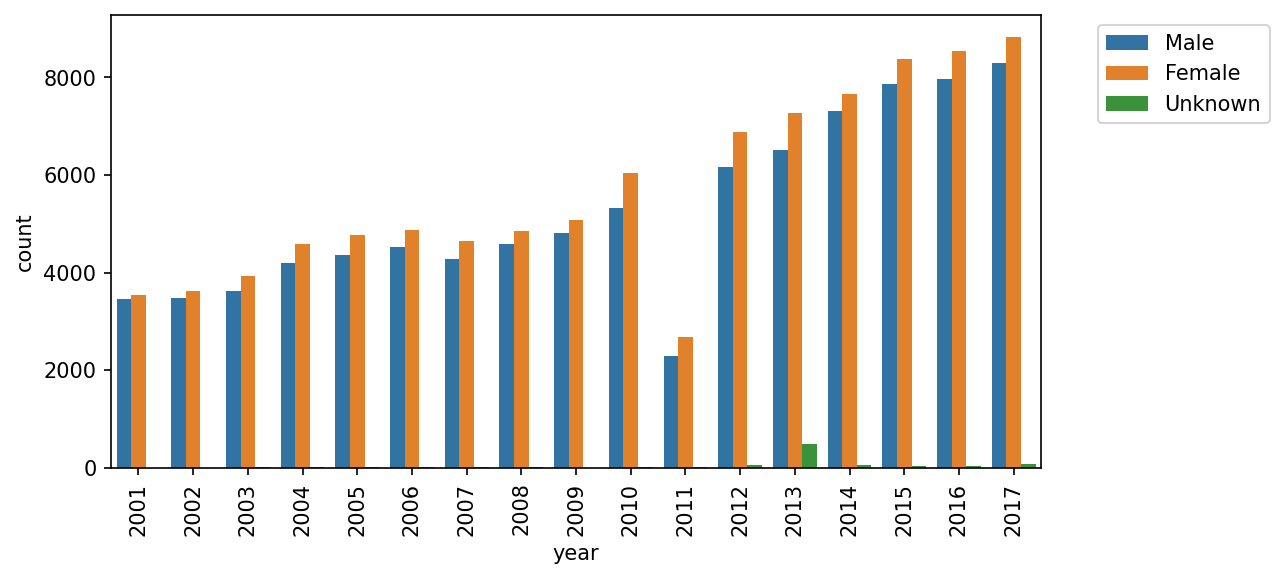

In [384]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='year',data=df, hue='gender')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (1.05, 1))

# **What happened in 2011?**


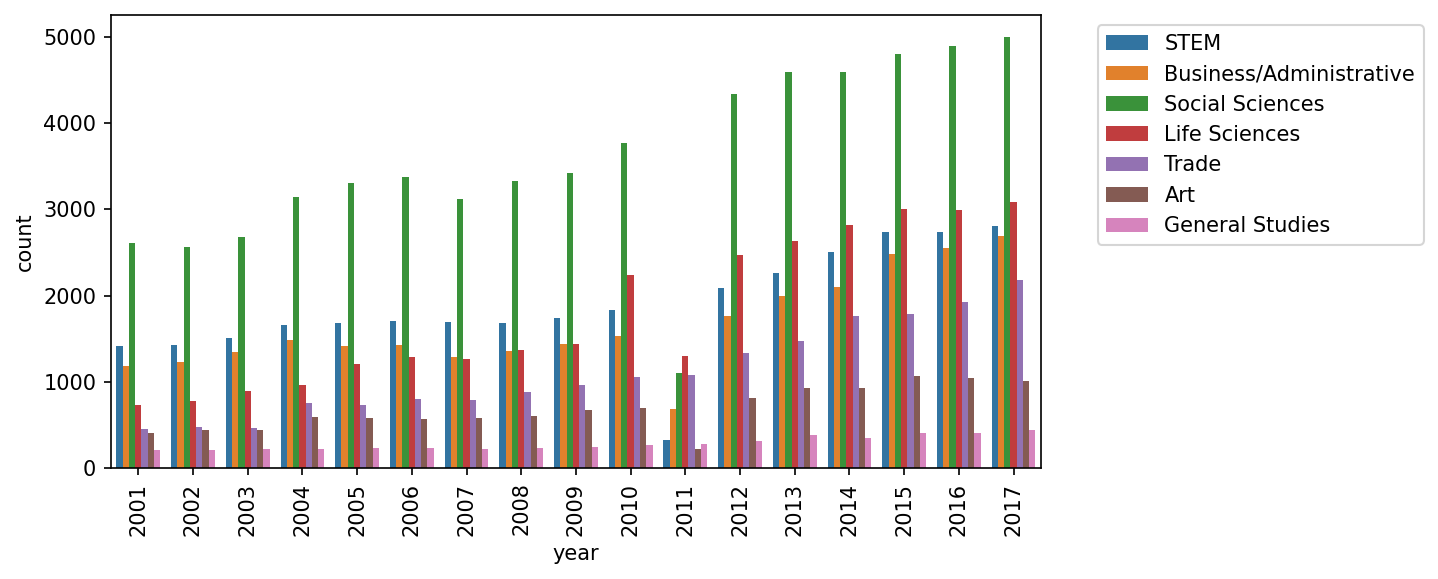

In [385]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(x='year',data=df, hue='programName')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (1.05, 1))

It doesn't seem like 'year' is useful to have. So, let's drop it.

In [386]:
df = df.drop('year',axis=1)

Should drop the **unknown** genders as well so we can simplify the model into a simpler binary classification problem.

In [387]:
df = df[df["gender"].str.contains("Unknown")==False]

In [388]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185324 entries, 19 to 221941
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   institutionName   185324 non-null  object
 1   institutionLevel  185324 non-null  object
 2   gender            185324 non-null  object
 3   ethnicity         185324 non-null  object
 4   degreeLevel       185324 non-null  object
 5   residency         185324 non-null  object
 6   programName       185324 non-null  object
 7   ageAvg            185324 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 12.7+ MB


In [391]:
type(df_age_std)

pandas.core.frame.DataFrame

In [392]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [399]:
df_age = df_dummies['ageAvg']

In [404]:
from sklearn.preprocessing import StandardScaler

df_dummies.loc[:,['ageAvg']] = StandardScaler().fit_transform(df_dummies.loc[:,['ageAvg']])

This one line scales only the selected column in the original dataframe in one go without having to drop and concatenate.

From user Addy:

https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set/38420977#38420977

In [405]:
df_dummies.head()

,ageAvg,institutionName_Aims Community College,institutionName_Arapahoe Community College,institutionName_CSU-Global Campus,institutionName_Colorado Mesa University,institutionName_Colorado Mountain College,institutionName_Colorado Northwestern Community College,institutionName_Colorado School of Mines,institutionName_Colorado State University,institutionName_Colorado State University - Pueblo,institutionName_Community College of Aurora,institutionName_Community College of Denver,institutionName_Fort Lewis College,institutionName_Front Range Community College,institutionName_Lamar Community College,institutionName_Metropolitan State University of Denver,institutionName_Morgan Community College,institutionName_Northeastern Junior College,institutionName_Otero Junior College,institutionName_Pikes Peak Community College,institutionName_Pueblo Community College,institutionName_Red Rocks Community College,institutionName_Trinidad State Junior College,institutionName_University of Colorado Boulder,institutionName_University of Colorado Colorado Springs,institutionName_University of Colorado Denver,institutionName_University of Northern Colorado,institutionName_Western State Colorado University,institutionLevel_University,gender_Male,ethnicity_Asian or Pacific Islander,ethnicity_Black or African American,"ethnicity_Black or African American, non-Hispanic",ethnicity_Hawaiian or Pacific Islander,ethnicity_Hispanic,ethnicity_More than one race/ethnicity (non-hispanic),ethnicity_Native American or Alaskan Native,ethnicity_Non-Resident Alien,ethnicity_Unknown,ethnicity_Unknown Ethnicity,"ethnicity_White, non-Hispanic",degreeLevel_Bachelor,degreeLevel_Certificate,degreeLevel_Doctoral,degreeLevel_Masters,degreeLevel_OtherGraduate,degreeLevel_Professional,degreeLevel_Specialist,residency_Out-of-State,residency_Unclassified/Unspecified,programName_Business/Administrative,programName_General Studies,programName_Life Sciences,programName_STEM,programName_Social Sciences,programName_Trade
19,-0.858381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
199,-0.858381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
279,-0.858381,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
422,-0.272613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
512,1.094180,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [406]:
X = df_dummies.drop('gender_Male', axis=1)
y = df_dummies['gender_Male']

In [407]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# **4. Model Comparison**

Here we will run our classification algorithms and run our models.

# **5. Experiment Summary**